In [55]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams

import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
%load_ext autoreload
%autoreload 2

In [68]:
random_state = 42

dataset = make_blobs(n_samples=1100, n_features=10, centers=2, cluster_std=9, random_state=random_state)

In [81]:
x, y = dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

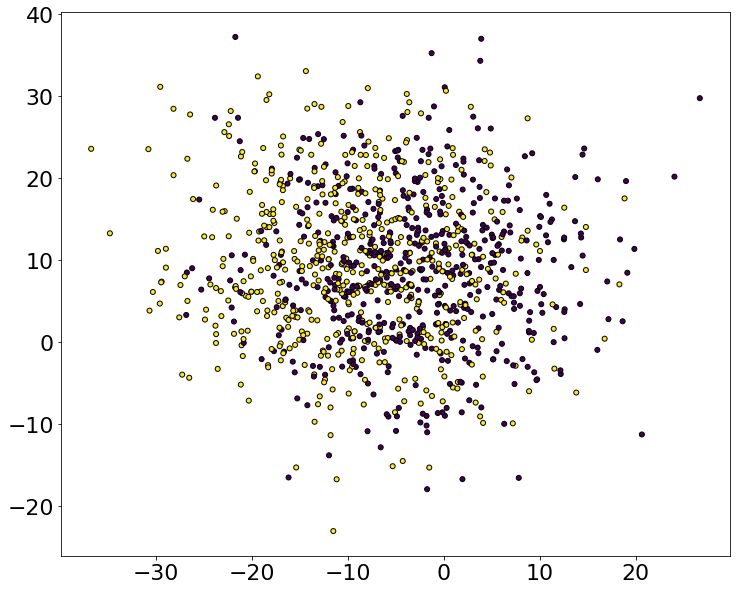

In [82]:
rcParams['figure.figsize'] = 12, 10
mpl.rcParams.update({'font.size': 22})

plt.scatter(x[:, 0], x[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [83]:
from classifier_tree import Classifier_Tree

In [105]:
%%time

tree = Classifier_Tree(5, 2, 'gini')
tree.fit(x_train, y_train)

probas = tree.predict_probas(x_test, y_test)

CPU times: user 6.6 s, sys: 8 ms, total: 6.61 s
Wall time: 6.62 s


In [106]:
print roc_auc_score(y_test, probas[:, 1])
print accuracy_score(y_test, np.argmax(probas, axis=1))

0.8199602122015915
0.7636363636363637


In [107]:
auc_stump = roc_auc_score(y_test, probas[:, 1])
acc_stump = accuracy_score(y_test, np.argmax(probas, axis=1))

In [90]:
from adaboost import AdaBoostClassifier

In [97]:
%%time

algo = AdaBoostClassifier(max_depth=2)
algo.fit(x_train, y_train, 100, x_test, y_test)

probas = algo.predict_probas(x_test, y_test)

Training Tree number: 0
-------------------------------
0.30303030303030304
Training Tree number: 1
-------------------------------
0.28188405797101446
Training Tree number: 2
-------------------------------
0.32124804474200974
Training Tree number: 3
-------------------------------
0.4021486495845198
Training Tree number: 4
-------------------------------
0.3417127020017217
Training Tree number: 5
-------------------------------
0.3407578113374654
Training Tree number: 6
-------------------------------
0.4274441753632679
Training Tree number: 7
-------------------------------
0.4187797596608266
Training Tree number: 8
-------------------------------
0.4178097119025713
Training Tree number: 9
-------------------------------
0.42540830032679283
Training Tree number: 10
-------------------------------
0.4308866649859969
Training Tree number: 11
-------------------------------
0.4126971541980877
Training Tree number: 12
-------------------------------
0.40218473188625325
Training Tree num

0.44179937145177334
Training Tree number: 76
-------------------------------
0.45216211222854874
Training Tree number: 77
-------------------------------
0.4801236028516827
Training Tree number: 78
-------------------------------
0.48166871205095396
Training Tree number: 79
-------------------------------
0.4823170158012457
Training Tree number: 80
-------------------------------
0.45122689137440336
Training Tree number: 81
-------------------------------
0.4802326904955584
Training Tree number: 82
-------------------------------
0.482215268190137
Training Tree number: 83
-------------------------------
0.4599894452364607
Training Tree number: 84
-------------------------------
0.4655775496754837
Training Tree number: 85
-------------------------------
0.4890522234904385
Training Tree number: 86
-------------------------------
0.4882677047797059
Training Tree number: 87
-------------------------------
0.48853668673066303
Training Tree number: 88
-------------------------------
0.476728

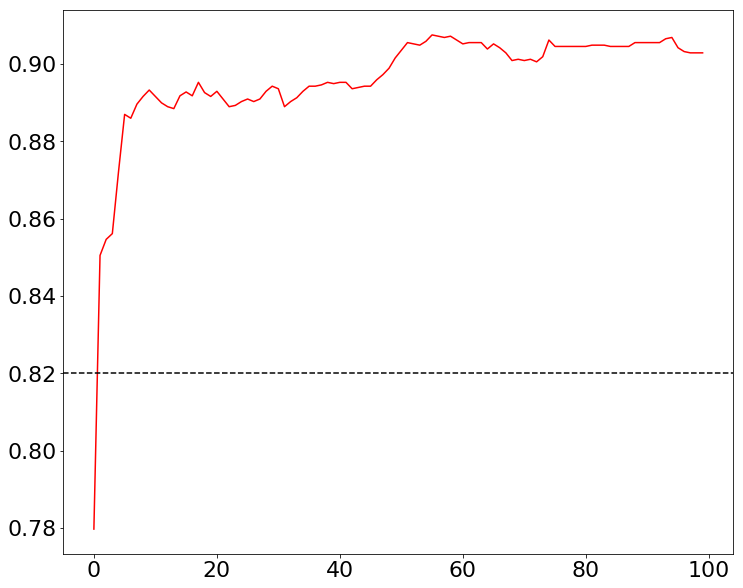

In [108]:
rcParams['figure.figsize'] = 12, 10
mpl.rcParams.update({'font.size': 22})

plt.plot(range(len(algo.auc)), algo.auc, color='r')
plt.axhline(y=auc_stump, color='k', linestyle='--')

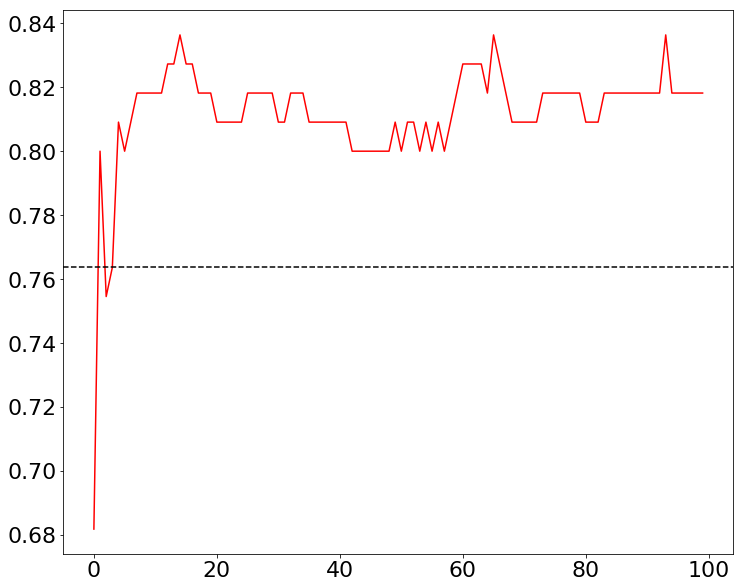

In [109]:
rcParams['figure.figsize'] = 12, 10
mpl.rcParams.update({'font.size': 22})

plt.plot(range(len(algo.auc)), algo.acc, color='r')
plt.axhline(y=acc_stump, color='k', linestyle='--')

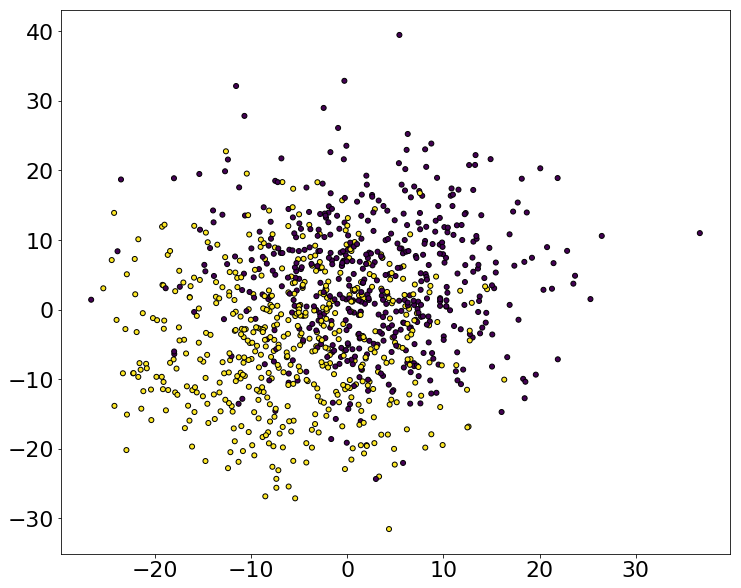

In [37]:
plt.scatter(x[:, 3], x[:, 9], marker='o', c=y,
            s=25, edgecolor='k')